### Note 
1) Used for non-linear dataset and outlier detection 
2) minpoint, Epn(r),core_point(noPoint >= min_point),boundary_point(noPiont < minpoint>),Noise_point(outlier)

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_moons

In [34]:
make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

In [35]:
x,y = make_moons(n_samples=250,noise=0.5)

In [36]:
df = pd.DataFrame(x,columns=['first_column','second_column'])

In [37]:
df

,first_column,second_column
0,1.571661,0.064946
1,0.171176,-0.300926
2,-0.589401,-0.433744
3,0.829869,-0.512842
4,-1.140834,0.511640
...,...,...
245,0.229922,-0.155963
246,-0.872937,0.092784
247,-0.638965,0.610882
248,0.882663,0.325126


In [38]:
df2 = pd.DataFrame(y,columns=["classifications"])

In [39]:
df2.isna().sum()

classifications    0
dtype: int64

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   classifications  250 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [41]:
new_df = pd.concat([df,df2])

In [42]:
new_df

,first_column,second_column,classifications
0,1.571661,0.064946,NaN
1,0.171176,-0.300926,NaN
2,-0.589401,-0.433744,NaN
3,0.829869,-0.512842,NaN
4,-1.140834,0.511640,NaN
...,...,...,...
245,NaN,NaN,1.0
246,NaN,NaN,0.0
247,NaN,NaN,0.0
248,NaN,NaN,1.0


In [43]:
df = {"data1":x[:,0],"data2":x[:,1],"output":y}

In [44]:
new_df = pd.DataFrame(df)

In [45]:
new_df

,data1,data2,output
0,1.571661,0.064946,1
1,0.171176,-0.300926,1
2,-0.589401,-0.433744,1
3,0.829869,-0.512842,1
4,-1.140834,0.511640,0
...,...,...,...
245,0.229922,-0.155963,1
246,-0.872937,0.092784,0
247,-0.638965,0.610882,0
248,0.882663,0.325126,1


<Axes: xlabel='data1', ylabel='data2'>

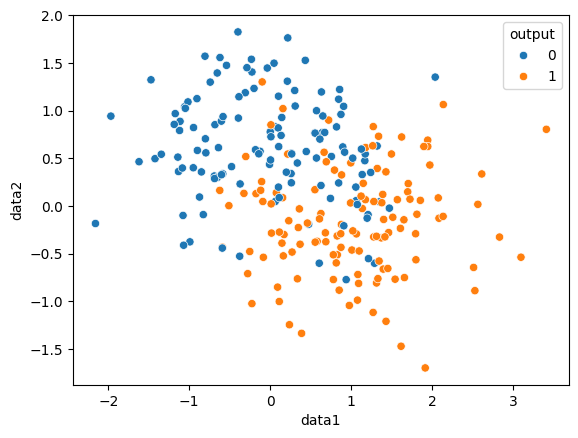

In [46]:
sns.scatterplot(x="data1",y="data2",data=new_df,hue="output")

In [47]:
from sklearn.cluster import DBSCAN

In [51]:
db = DBSCAN(eps=0.5,min_samples=5)

In [55]:
new_df["predicted"] = db.fit_predict(new_df)

In [60]:
new_df.tail(5)

,data1,data2,output,predicted
245,0.229922,-0.155963,1,0
246,-0.872937,0.092784,0,1
247,-0.638965,0.610882,0,1
248,0.882663,0.325126,1,0
249,1.242047,0.350739,0,1


<Axes: xlabel='data1', ylabel='data2'>

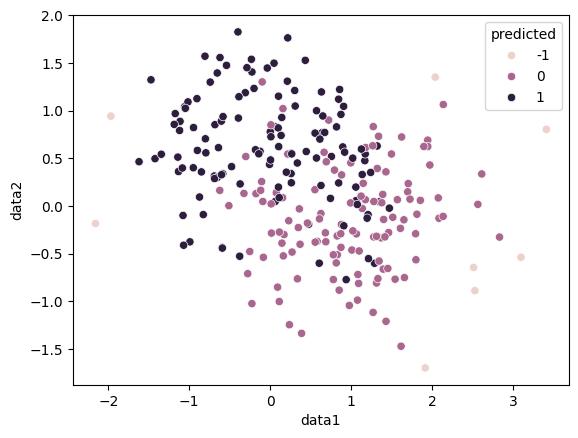

In [61]:
sns.scatterplot(x="data1",y="data2",data=new_df,hue="predicted")